In [1]:
%run ../functions.ipynb

In [2]:
%run ../pycodes/wavelets_pca_with_zhost_1100_average_precision.py

In [3]:
%run ../pycodes/wavelets_pca_with_zhost_1100_roc_auc.py

In [4]:
%matplotlib inline

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt

### Concatenation of feature DF and label DF

In [6]:
#df_feat = pd.read_pickle("../../data/processed/df_GP_wav_PCA28.pkl")
#df_label = pd.read_pickle("../../data/processed/df_labels.pkl")

In [65]:
#df_feat

In [66]:
#df_label

In [7]:
def rewriting_ID(ID):
    if len(ID) < 8:
        hash = ID
        return hash[:hash.find('N') + 1] + '0'*(8-len(hash)) + hash[hash.find('N')+1:]
    else:
        return ID

In [8]:
#df = pd.concat([df_feat,df_label['type'],df_label['type_bool']], axis = 1)
#df['ID'] = df['ID'].apply(rewriting_ID)
#df = df.sort_values('ID')
#df = df.set_index('ID')
##df
#df.to_pickle('./df_28features.pkl')

## K-Fold division

In [6]:
df = pd.read_pickle("../../data/processed/df_28features.pkl")

In [7]:
df

,desg,desi,desr,desz,Xaxis,desg_GP,desi_GP,desr_GP,desz_GP,wavelets,...,f21,f22,f23,f24,f25,f26,f27,f28,type,type_bool
ID,,,,,,,,,,,,,,,,,,,,,
SN000017,"[[6.984000000004016, 6.122, 6.377], [7.9920000...","[[0.012000000002444722, 0.6447, 49.95], [7.008...","[[0.0, 4.41, 17.58], [8.00800000000163, 1.002,...","[[4.121000000006461, 1.337, 3.581], [7.0230000...","[0.0, 1.3437474747475018, 2.6874949494950036, ...","([2.1790669622347325, 2.508001685841991, 2.869...","([10.397060897840504, 10.577637884754534, 10.7...","([1.5588534229682, 1.5163625398617389, 1.45121...","([2.4493108381108755, 2.6225647004586676, 2.75...","[2.5170703344071526, 3.609106466610777, 4.6966...",...,6.282370,50.762164,32.655405,-49.937472,-12.828625,-32.146220,-60.104959,-91.630483,II,False
SN000019,"[[0.0, 1.325, 5.225], [1.0120000000024447, 10....","[[10.023000000001048, 1.944, 4.071], [23.06599...","[[0.012000000002444722, 2.468, 3.577], [23.050...","[[9.00800000000163, 6.876, 4.915], [14.0159999...","[0.0, 0.9801111111111381, 1.9602222222222763, ...","([2.219675101833163, 2.219675198412055, 2.2196...","([-0.19220466685970194, -0.0681479629423194, 0...","([1.861237782410762, 1.7895540003134789, 1.726...","([3.654910834866328, 3.8235492654180803, 3.993...","[4.43934546360616, 4.439347606905569, 4.439349...",...,-1.660370,-6.681529,7.543018,-21.565713,6.697030,23.206105,19.685687,-2.361151,II,False
SN000126,"[[0.0, 0.5652, 2.636], [23.91399999999703, 0.5...","[[7.932999999997264, 1.535, 4.162], [36.811999...","[[15.930000000000291, 1.963, 3.215], [27.02300...","[[7.956999999994878, 0.1151, 2.711], [15.97599...","[0.0, 1.584242424242389, 3.168484848484778, 4....","([0.35689014312282547, 0.36868698625858665, 0....","([0.34290692312134574, 0.39300951014427277, 0....","([0.11936109021103114, 0.23793544213573692, 0....","([-0.6661782956213349, -0.5705737568129523, -0...","[2.6824500442573638, 1.7791579281136436, 1.110...",...,-4.844406,-5.182916,-4.623177,-14.151318,-17.448765,-2.040187,-3.742288,-1.371967,II,False
SN000172,"[[0.0, 8.814, 4.79], [2.0, 9.327, 2.25], [9.98...","[[0.031000000002677552, 3.05, 5.436], [2.15600...","[[10.0, 1.734, 1.254], [11.988000000004831, 12...","[[10.039000000004307, 12.9, 2.19], [12.0310000...","[0.0, 1.2923333333333222, 2.5846666666666445, ...","([6.562159405329549, 9.1252195867519, 11.89292...","([2.6439974671168613, 3.295315393791398, 3.956...","([-12.447889370713835, -12.656461305309037, -1...","([10.889899390805923, 11.500413415470769, 12.1...","[6.47820341295315, 11.499857208884713, 17.4609...",...,59.746304,-26.260533,76.077662,9.526661,-22.349478,43.203019,-9.291451,-29.942253,II,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN899766,"[[6.984000000004016, 2.619, 6.376], [21.973000...","[[0.012000000002444722, 48.86, 49.95], [8.0230...","[[0.0, 19.65, 17.59], [6.992000000005646, 5.34...","[[4.121000000006461, 1.07, 3.581], [7.02300000...","[0.0, 1.474707070707136, 2.949414141414272, 4....","([3.1774853444736557, 3.1774855699966595, 3.17...","([6.273860823260804, 6.090278522008031, 5.9044...","([8.309936227222874, 8.154384056314196, 7.9766...","([1.0347047221511048, 1.209742608349444, 1.388...","[6.3549756079875195, 6.354973557479621, 6.3549...",...,-11.034139,-11.585586,0.493652,-8.236987,21.397666,33.915491,19.602834,-7.483947,II,False
SN899772,"[[0.0, 8.811, 25.57], [5.875, 1.341, 4.764], [...","[[0.8550000000032014, 10.26, 30.95], [21.81600...","[[0.015000000006693881, 7.061, 4.154], [32.820...","[[19.851000000002387, 3.151, 4.938], [27.85100...","[0.0, 1.6130000000000542, 3.2260000000001083, ...","([3.375523849152177, 2.9073715158475206, 2.313...","([5.9244796371948585, 5.563986512566748, 5.176...","([6.3162013263673575, 5.386246481590906, 4.336...","([11.990492759478087, 11.552298169626269, 11.0...","[3.341657653722518, 4.5430537588317765, 5.0680...",...,-71.815425,10.765688,-47.865340,-62.752726,-36.391351,8.700859,-22.573419,25.381878,II,False
SN899777,"[[0.0, 3.066, 3

In [8]:
splits = 5

In [9]:
X = df.loc[:,'f1':'f28']
y = np.array(df.type_bool)

kf = KFold(n_splits = splits)
X_train = []
X_test = []
y_train = []
y_test = []
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train.append(X.iloc[train_index])
    X_test.append(X.iloc[test_index])
    y_train.append(y[train_index])
    y_test.append(y[test_index])

TRAIN: [ 4264  4265  4266 ... 21314 21315 21316] TEST: [   0    1    2 ... 4261 4262 4263]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [4264 4265 4266 ... 8525 8526 8527]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [ 8528  8529  8530 ... 12788 12789 12790]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [12791 12792 12793 ... 17051 17052 17053]
TRAIN: [    0     1     2 ... 17051 17052 17053] TEST: [17054 17055 17056 ... 21314 21315 21316]


In [10]:
splits = 19

In [11]:
X_real = df.loc[:,'f1':'f28']
y_real = np.array(df.type_bool)

kf_real = KFold(n_splits = splits)
X_train_real = []
X_test_real = []
y_train_real = []
y_test_real = []
for train_index_real, test_index_real in kf_real.split(X_real):
    print("TRAIN:", train_index_real, "TEST:", test_index_real)
    X_train_real.append(X_real.iloc[train_index_real])
    X_test_real.append(X_real.iloc[test_index_real])
    y_train_real.append(y_real[train_index_real])
    y_test_real.append(y_real[test_index_real])

TRAIN: [ 1122  1123  1124 ... 21314 21315 21316] TEST: [   0    1    2 ... 1119 1120 1121]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [1122 1123 1124 ... 2241 2242 2243]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [2244 2245 2246 ... 3363 3364 3365]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [3366 3367 3368 ... 4485 4486 4487]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [4488 4489 4490 ... 5607 5608 5609]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [5610 5611 5612 ... 6729 6730 6731]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [6732 6733 6734 ... 7851 7852 7853]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [7854 7855 7856 ... 8973 8974 8975]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [ 8976  8977  8978 ... 10095 10096 10097]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [10098 10099 10100 ... 11217 11218 11219]
TRAIN: [    0     1     2 ... 21314 21315 21316] TEST: [11220 11221 11222 ... 

## Training

#### Splits = 5

In [12]:
np.random.seed(9)
splits = 5
auc_scores = model_selection.cross_val_score(exported_pipeline, X, y, scoring = 'roc_auc', cv=splits)
avg_scores = model_selection.cross_val_score(exported_pipeline, X, y, scoring = 'average_precision', cv=splits)
def_scores = model_selection.cross_val_score(exported_pipeline, X, y, cv=splits)
print("AUC Scores :", auc_scores, "\n", 
      "Average Precision Scores :", avg_scores, "\n", 
      "Default Scores :", def_scores)

AUC Scores : [0.97980921 0.98170788 0.98442103 0.98160326 0.97888181] 
 Average Precision Scores : [0.93906958 0.93850593 0.94446475 0.93569984 0.92721475] 
 Default Scores : [0.93667917 0.93644465 0.9439362  0.93619517 0.93197279]


In [13]:
exported_pipeline.fit(X_train[0], y_train[0]);

Confusion matrix, without normalization
[[3097  167]
 [ 108  892]]
Normalized confusion matrix
[[0.94883578 0.05116422]
 [0.108      0.892     ]]


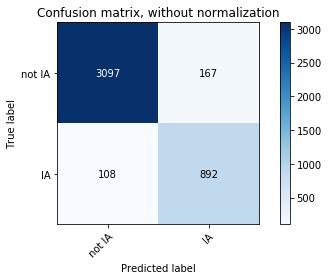

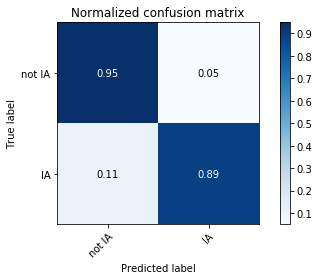

In [14]:
y_pred = exported_pipeline.predict(X_test[0])
#cm = confusion_matrix(y_test[0], y_pred)
plot_confusion_matrix(y_test[0],y_pred, ['not IA','IA' ], normalize=False)
plot_confusion_matrix(y_test[0],y_pred, ['not IA','IA' ], normalize=True)

#### Splits = 19

In [15]:
class SplitterSwapper:
    '''Swaps training and test data in a splitter class.'''
    def __init__(self, fold):
        self.fold = fold
    def split(self, *args):
        for training, testing in self.fold.split(*args):
            yield testing, training

In [16]:
splits = 19

In [17]:
auc_scores = model_selection.cross_val_score(exported_pipeline, X_real, y_real, scoring = 'roc_auc', cv=SplitterSwapper(StratifiedKFold(19)))
avg_scores = model_selection.cross_val_score(exported_pipeline, X_real, y_real, scoring = 'average_precision', cv=SplitterSwapper(StratifiedKFold(19)))
def_scores = model_selection.cross_val_score(exported_pipeline, X_real, y_real, cv=SplitterSwapper(StratifiedKFold(19)))
print("AUC Scores :", auc_scores, "\n", 
      "Average Precision Scores :", avg_scores, "\n", 
      "Default Scores :", def_scores)

AUC Scores : [0.95973206 0.95747096 0.95360318 0.95557417 0.95281375 0.95119778
 0.95560695 0.95344467 0.95539483 0.95918241 0.95999488 0.96098938
 0.95702813 0.952382   0.94928293 0.95523786 0.95858543 0.96254292
 0.95795517] 
 Average Precision Scores : [0.85020458 0.85741235 0.8385017  0.84644815 0.8503099  0.82510666
 0.84919322 0.8456907  0.82838697 0.85020139 0.86353069 0.8636827
 0.84478817 0.84223505 0.82855148 0.84720917 0.85489162 0.85948361
 0.85135055] 
 Default Scores : [0.90106462 0.90022283 0.89982669 0.89740035 0.89878683 0.89670711
 0.89621193 0.89967814 0.90002476 0.90264917 0.90596682 0.90670958
 0.90279772 0.89987621 0.89135925 0.90022283 0.90448131 0.90893786
 0.90285205]


In [18]:
exported_pipeline.fit(X_test_real[0], y_test_real[0])

Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('stackingestimator-1',
                                                 StackingEstimator(estimator=KNeighborsClassifier(algorithm='auto',
                                                                                                  leaf_size=30,
                                                                                                  metric='minkowski',
                                                                                                  metric_params=None,
                                                                                                  n_jobs=None,
                                                                                                  n_neighbors=21,
                                                                                                  p=1,
                                      

Confusion matrix, without normalization
[[14221  1169]
 [  823  3982]]
Normalized confusion matrix
[[0.92404159 0.07595841]
 [0.17127992 0.82872008]]


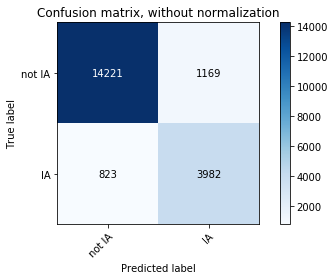

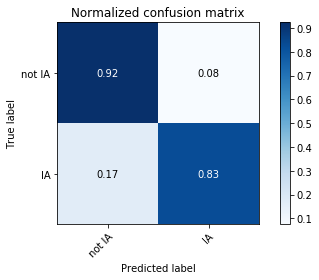

In [19]:
y_pred = exported_pipeline.predict(X_train_real[0])
#cm = confusion_matrix(y_train_real[0], y_pred)
plot_confusion_matrix(y_train_real[0],y_pred, ['not IA','IA' ], normalize=False)
plot_confusion_matrix(y_train_real[0],y_pred, ['not IA','IA' ], normalize=True)

In [20]:
df

,desg,desi,desr,desz,Xaxis,desg_GP,desi_GP,desr_GP,desz_GP,wavelets,...,f21,f22,f23,f24,f25,f26,f27,f28,type,type_bool
ID,,,,,,,,,,,,,,,,,,,,,
SN000017,"[[6.984000000004016, 6.122, 6.377], [7.9920000...","[[0.012000000002444722, 0.6447, 49.95], [7.008...","[[0.0, 4.41, 17.58], [8.00800000000163, 1.002,...","[[4.121000000006461, 1.337, 3.581], [7.0230000...","[0.0, 1.3437474747475018, 2.6874949494950036, ...","([2.1790669622347325, 2.508001685841991, 2.869...","([10.397060897840504, 10.577637884754534, 10.7...","([1.5588534229682, 1.5163625398617389, 1.45121...","([2.4493108381108755, 2.6225647004586676, 2.75...","[2.5170703344071526, 3.609106466610777, 4.6966...",...,6.282370,50.762164,32.655405,-49.937472,-12.828625,-32.146220,-60.104959,-91.630483,II,False
SN000019,"[[0.0, 1.325, 5.225], [1.0120000000024447, 10....","[[10.023000000001048, 1.944, 4.071], [23.06599...","[[0.012000000002444722, 2.468, 3.577], [23.050...","[[9.00800000000163, 6.876, 4.915], [14.0159999...","[0.0, 0.9801111111111381, 1.9602222222222763, ...","([2.219675101833163, 2.219675198412055, 2.2196...","([-0.19220466685970194, -0.0681479629423194, 0...","([1.861237782410762, 1.7895540003134789, 1.726...","([3.654910834866328, 3.8235492654180803, 3.993...","[4.43934546360616, 4.439347606905569, 4.439349...",...,-1.660370,-6.681529,7.543018,-21.565713,6.697030,23.206105,19.685687,-2.361151,II,False
SN000126,"[[0.0, 0.5652, 2.636], [23.91399999999703, 0.5...","[[7.932999999997264, 1.535, 4.162], [36.811999...","[[15.930000000000291, 1.963, 3.215], [27.02300...","[[7.956999999994878, 0.1151, 2.711], [15.97599...","[0.0, 1.584242424242389, 3.168484848484778, 4....","([0.35689014312282547, 0.36868698625858665, 0....","([0.34290692312134574, 0.39300951014427277, 0....","([0.11936109021103114, 0.23793544213573692, 0....","([-0.6661782956213349, -0.5705737568129523, -0...","[2.6824500442573638, 1.7791579281136436, 1.110...",...,-4.844406,-5.182916,-4.623177,-14.151318,-17.448765,-2.040187,-3.742288,-1.371967,II,False
SN000172,"[[0.0, 8.814, 4.79], [2.0, 9.327, 2.25], [9.98...","[[0.031000000002677552, 3.05, 5.436], [2.15600...","[[10.0, 1.734, 1.254], [11.988000000004831, 12...","[[10.039000000004307, 12.9, 2.19], [12.0310000...","[0.0, 1.2923333333333222, 2.5846666666666445, ...","([6.562159405329549, 9.1252195867519, 11.89292...","([2.6439974671168613, 3.295315393791398, 3.956...","([-12.447889370713835, -12.656461305309037, -1...","([10.889899390805923, 11.500413415470769, 12.1...","[6.47820341295315, 11.499857208884713, 17.4609...",...,59.746304,-26.260533,76.077662,9.526661,-22.349478,43.203019,-9.291451,-29.942253,II,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN899766,"[[6.984000000004016, 2.619, 6.376], [21.973000...","[[0.012000000002444722, 48.86, 49.95], [8.0230...","[[0.0, 19.65, 17.59], [6.992000000005646, 5.34...","[[4.121000000006461, 1.07, 3.581], [7.02300000...","[0.0, 1.474707070707136, 2.949414141414272, 4....","([3.1774853444736557, 3.1774855699966595, 3.17...","([6.273860823260804, 6.090278522008031, 5.9044...","([8.309936227222874, 8.154384056314196, 7.9766...","([1.0347047221511048, 1.209742608349444, 1.388...","[6.3549756079875195, 6.354973557479621, 6.3549...",...,-11.034139,-11.585586,0.493652,-8.236987,21.397666,33.915491,19.602834,-7.483947,II,False
SN899772,"[[0.0, 8.811, 25.57], [5.875, 1.341, 4.764], [...","[[0.8550000000032014, 10.26, 30.95], [21.81600...","[[0.015000000006693881, 7.061, 4.154], [32.820...","[[19.851000000002387, 3.151, 4.938], [27.85100...","[0.0, 1.6130000000000542, 3.2260000000001083, ...","([3.375523849152177, 2.9073715158475206, 2.313...","([5.9244796371948585, 5.563986512566748, 5.176...","([6.3162013263673575, 5.386246481590906, 4.336...","([11.990492759478087, 11.552298169626269, 11.0...","[3.341657653722518, 4.5430537588317765, 5.0680...",...,-71.815425,10.765688,-47.865340,-62.752726,-36.391351,8.700859,-22.573419,25.381878,II,False
SN899777,"[[0.0, 3.066, 3

In [21]:
len(y_pred)

20195